# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [99]:
# Import your libraries

import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import expon

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [100]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

#uses random.normal to create a normal distribution with the given parameters
dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))
tests

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (2.5499890831777514, 0.2794324934746755)
1     (0.7781697670552892, 0.6776767439798677)
2     (5.164947178544193, 0.07558680188544209)
3    (1.9398398580653708, 0.37911339286420365)
4    (0.45963335911077513, 0.7946792701081216)
dtype: object

#### Interpret the normaltest results and make your observations.

In [101]:
# Explain the test results here:

# Definiton: normaltest tests whether a sample differs from a normal distribution. It tests the null hypothesis 
# that a sample comes from a normal distribution. 
# It returns a 2-tuple of the chi-squared statistic, and the associated p-value. 
# Given the null hypothesis that x came from a normal distribution, the p-value represents the probability 
# that a chi-squared statistic that large (or larger) would be seen.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.
# 0.05 is the standard threshold, anything above is saying yes it is a normal distribution. 

# Observtions: we can see that all of these are normal distribution. 

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

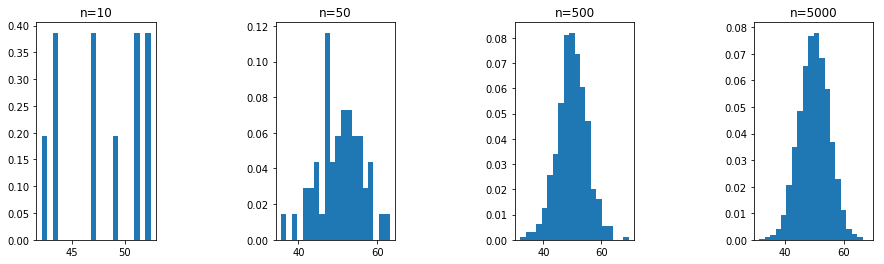

In [102]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [103]:
# Your comment and explanation here:

# With less values it's harder to rebuild a normal distribution curve.
# The more values there are in the sample, the more histogram looks like a normal distribution one.

# Central Limit Theorem: the more samples we take, the closer the means of our sample means will get 
# to the population mean

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

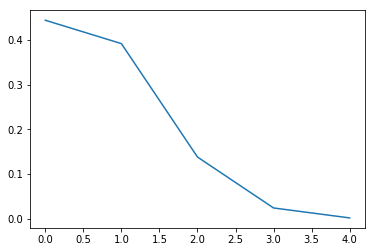

In [104]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [105]:
# Your comment here
# There's more probability that 1 out of 5 people will click on the ad is the highest; if we expect more people
# to click on the ad, the probability decreases as the number of people increases.

#### Now plot PMP with 50, 500, and 5000 visitors.

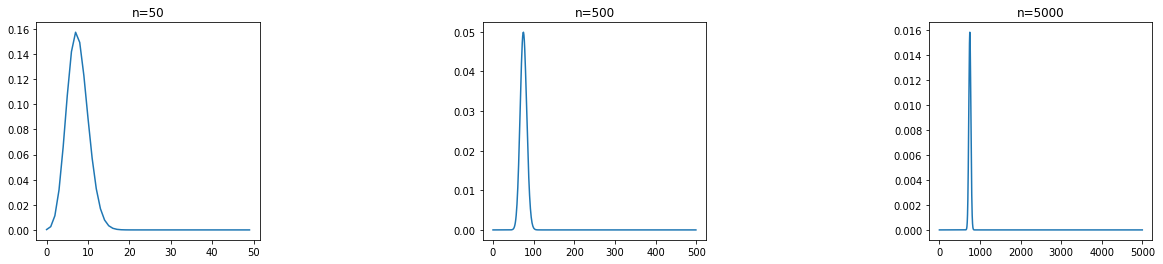

In [106]:
# Your code here
visitors = [50, 500, 5000]
p = 0.15

f, ax = plt.subplots(1, 3)

f.set_figwidth(20)

f.subplots_adjust(wspace=1)

for i in range(0, 3):
    ax[i].set_title('n=%s' % (visitors[i]))
    dist = binom(visitors[i], p)
    x = range(visitors[i])
    ax[i].plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [107]:
# Your comment here
# Similar as for the previous example, the more visitors we expect to click, the lest the probability.
# However, we see that for 50 visitors the probability goes up as from the 1st visitor, and is the highest around
# 9 visitors, and then goes back down, and finally goes down to 0 at around 15 visitors; meaning that the 
# probability that 16 and more out of 50 visitors click on the ad is 0.
# For 500 and 500 visitors we see that for the probability that only 1 or several visitors click on the add is 0,
# meaning that for this number of visitors, there will most likely be more that 1 visitor that clicks on the ad.
# Similar as for 50 visitors, the curb of 500 and 5000 has a peak of number of clicks where the probability is 
# the highest.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [108]:
# Your comment here
# Poisson distribution counts number of occurrences of an event within a time frame, eg, how many cars pass by
# within an our, how many sales company makes within a month etc. Poisson distribution gives the probability
# of an event occuring during a given period of time.


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [123]:
# Your code here
poisson.pmf(320, 300, 0)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [126]:
# Your code here
poisson.pmf(60, 300, 0)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

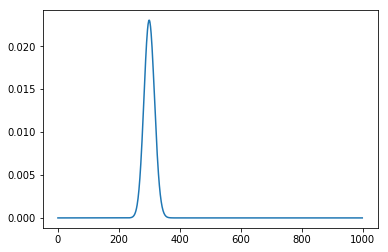

In [111]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)